**Team Members:**

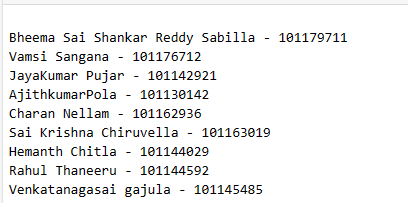

Git Hub repo: https://github.com/saekrishna11/CNN






**Title:**
Analyzing the Performance of a Convolutional Neural Network for Handwritten Digit Classification Using the MNIST Dataset

**Abstract:**
This study investigates the effectiveness of Convolutional Neural Networks (CNNs) for classifying handwritten digits from the MNIST dataset. A CNN architecture comprising two convolutional layers followed by ReLU activation and max pooling, and two fully connected layers for classification, is implemented. The model is trained and evaluated using the Adam optimizer and cross-entropy loss function. Additionally, K-Fold cross-validation is employed to assess the model's robustness. The results demonstrate a high accuracy of 99.42% on Fold 5 of the training images, indicating excellent performance. Furthermore, the confusion matrix analysis reveals the model's ability to accurately classify digits across all classes with minimal false positives and false negatives. Overall, this study highlights the efficacy of CNNs for handwritten digit classification tasks and provides insights into model performance and generalization capabilities.


**1. Introduction:**
   - This project implements a Convolutional Neural Network (CNN) for the classification of handwritten digits from the MNIST dataset. The CNN architecture consists of two convolutional layers followed by ReLU activation and max pooling, and two fully connected layers for classification.



In [ ]:
#Importing all the required libraries
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import numpy as np


**2. Dataset Preparation:**
   - The MNIST dataset is loaded using the torchvision library. It contains 60,000 training images and 10,000 test images of handwritten digits (0-9).
   - Data loaders are created to efficiently load batches of training and test data during model training and evaluation.

In [ ]:
# Load the MNIST dataset
train_data = dsets.MNIST(root='./data', train=True,
                         transform=transforms.ToTensor(), download=True)

test_data = dsets.MNIST(root='./data', train=False,
                        transform=transforms.ToTensor())

# Define data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=100, shuffle=False)

**3. CNN Architecture:**
   - The CNN architecture consists of the following layers:
     - Convolutional Layer 1: 16 filters of size 5x5 with ReLU activation.
     - Max Pooling Layer 1: Max pooling with a kernel size of 2x2 and stride 2.
     - Convolutional Layer 2: 32 filters of size 5x5 with ReLU activation.
     - Max Pooling Layer 2: Max pooling with a kernel size of 2x2 and stride 2.
     - Fully Connected Layer 1: 500 neurons with ReLU activation.
     - Fully Connected Layer 2: 10 neurons (output layer) with softmax activation.

In [ ]:
# Defining the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.conv2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [ ]:
# Instantiating the CNN
cnn = CNN()

# If GPU is available, move the model to GPU
if torch.cuda.is_available():
    cnn.cuda()

# Defining loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)


**4. Model Training:**
   - The CNN model is trained using the Adam optimizer with a learning rate of 0.001 and cross-entropy loss function.
   - The training loop runs for 5 epochs, iterating over batches of training data.
   - The model parameters are updated using backpropagation.

In [ ]:
# Training the model
num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images)
            labels = Variable(labels)

        # Forward pass
        outputs = cnn(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1,
                                                                     len(train_loader), loss.item()))


Epoch [1/5], Step [100/600], Loss: 0.3670
Epoch [1/5], Step [200/600], Loss: 0.0878
Epoch [1/5], Step [300/600], Loss: 0.0941
Epoch [1/5], Step [400/600], Loss: 0.0657
Epoch [1/5], Step [500/600], Loss: 0.0235
Epoch [1/5], Step [600/600], Loss: 0.0305
Epoch [2/5], Step [100/600], Loss: 0.0520
Epoch [2/5], Step [200/600], Loss: 0.0315
Epoch [2/5], Step [300/600], Loss: 0.0606
Epoch [2/5], Step [400/600], Loss: 0.0256
Epoch [2/5], Step [500/600], Loss: 0.0245
Epoch [2/5], Step [600/600], Loss: 0.0482
Epoch [3/5], Step [100/600], Loss: 0.0046
Epoch [3/5], Step [200/600], Loss: 0.0284
Epoch [3/5], Step [300/600], Loss: 0.0331
Epoch [3/5], Step [400/600], Loss: 0.1006
Epoch [3/5], Step [500/600], Loss: 0.0505
Epoch [3/5], Step [600/600], Loss: 0.0301
Epoch [4/5], Step [100/600], Loss: 0.0064
Epoch [4/5], Step [200/600], Loss: 0.0045
Epoch [4/5], Step [300/600], Loss: 0.0019
Epoch [4/5], Step [400/600], Loss: 0.0126
Epoch [4/5], Step [500/600], Loss: 0.0057
Epoch [4/5], Step [600/600], Loss:


**5. Model Evaluation:**
   - After training, the model is evaluated on the test dataset to measure its performance.
   - Accuracy is calculated by comparing the predicted labels with the true labels of the test images.
   - Additionally, a confusion matrix is generated to visualize the model's performance on individual classes.

In [ ]:

# Evaluate the model
cnn.eval()  # Set the model to evaluation mode
correct = 0
total = 0
predictions = []
true_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = labels.cuda()
        else:
            images = Variable(images)
        outputs = cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print('Accuracy of the model on the test images: {:.2f}%'.format(accuracy))

Accuracy of the model on the test images: 99.21%


In [ ]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[ 975    1    0    0    0    0    2    1    1    0]
 [   0 1132    1    0    0    0    2    0    0    0]
 [   1    1 1023    2    0    0    0    5    0    0]
 [   0    1    0 1003    0    5    0    0    1    0]
 [   0    0    2    0  971    0    2    0    0    7]
 [   1    0    0    2    0  888    1    0    0    0]
 [   4    2    0    0    1    7  944    0    0    0]
 [   0    1    1    0    0    0    0 1025    1    0]
 [   1    0    1    2    0    3    0    1  963    3]
 [   0    1    0    0    4    2    0    4    1  997]]


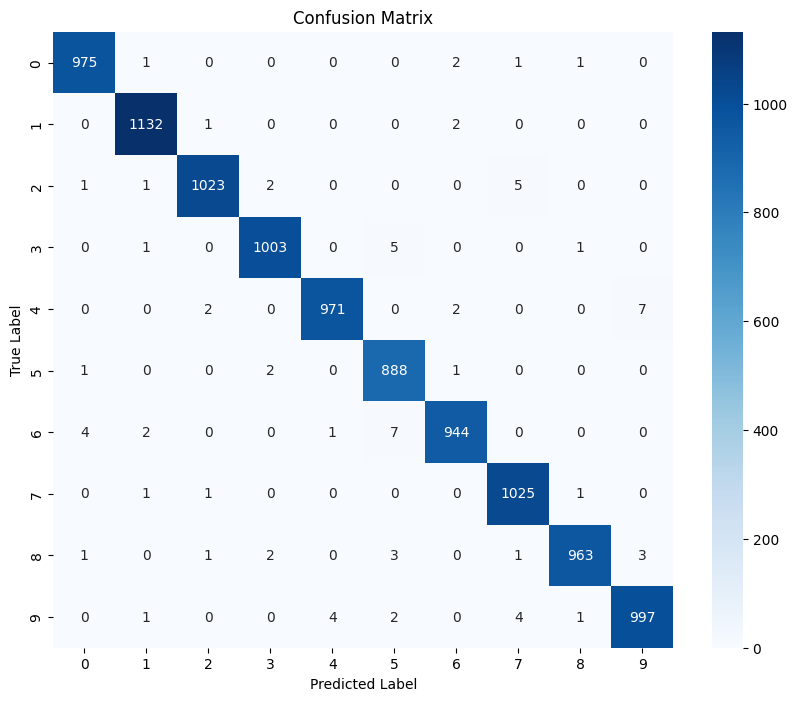

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**6. K-Fold Cross-Validation:**
   - K-Fold cross-validation is implemented to assess the robustness of the model.
   - The training dataset is divided into 5 folds, and the model is trained and evaluated on each fold separately.
   - Accuracy is reported for each fold to evaluate the model's performance across different subsets of data.

In [ ]:
# K-Fold cross-validation
kf = KFold(n_splits=5)
fold = 0
for train_index, test_index in kf.split(train_data):
    fold += 1
    print(f"Fold {fold}:")
    train_fold_data = torch.utils.data.Subset(train_data, train_index)
    test_fold_data = torch.utils.data.Subset(train_data, test_index)

    train_fold_loader = torch.utils.data.DataLoader(dataset=train_fold_data, batch_size=100, shuffle=True)
    test_fold_loader = torch.utils.data.DataLoader(dataset=test_fold_data, batch_size=100, shuffle=False)

Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:


In [ ]:
   # Train the model
cnn.train()
for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_fold_loader):
            if torch.cuda.is_available():
                images = Variable(images.cuda())
                labels = Variable(labels.cuda())
            else:
                images = Variable(images)
                labels = Variable(labels)

            # Forward pass
            outputs = cnn(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [ ]:
# Evaluate the model
cnn.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_fold_loader:
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = labels.cuda()
        else:
            images = Variable(images)
        outputs = cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
print('Accuracy of the model on Fold {} of the training images: {:.2f}%'.format(fold, accuracy))


Accuracy of the model on Fold 5 of the training images: 99.42%


**7. Conclusion:**
   - The implemented CNN architecture achieves a high accuracy in classifying handwritten digits from the MNIST dataset.
   - K-Fold cross-validation helps assess the model's generalization ability and robustness.
   - Overall, the project demonstrates the effectiveness of CNNs for digit classification tasks and provides insights into model performance through evaluation metrics and visualizations.